# Project 3- Phising Classification- Submitted by Monica

### Load necessary modules

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_rows = 100

### Read the input file

In [5]:
data=pd.read_csv('Phishing.csv')

In [6]:
data.shape

(11054, 31)

### The shape of the input is 11054 (rows) and 31 (variables)

In [7]:
data.columns

Index(['-1', '1', '1.1', '1.2', '-1.1', '-1.2', '-1.3', '-1.4', '-1.5', '1.3',
       '1.4', '-1.6', '1.5', '-1.7', '1.6', '-1.8', '-1.9', '-1.10', '0',
       '1.7', '1.8', '1.9', '1.10', '-1.11', '-1.12', '-1.13', '-1.14', '1.11',
       '1.12', '-1.15', '-1.16'],
      dtype='object')

### Columns return the first row which means the columns are not indexed. So the column names are added in the next section

In [8]:
data.columns=['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class' ]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              11054 non-null  int64
 1   LongURL              11054 non-null  int64
 2   ShortURL             11054 non-null  int64
 3   Symbol@              11054 non-null  int64
 4   Redirecting//        11054 non-null  int64
 5   PrefixSuffix-        11054 non-null  int64
 6   SubDomains           11054 non-null  int64
 7   HTTPS                11054 non-null  int64
 8   DomainRegLen         11054 non-null  int64
 9   Favicon              11054 non-null  int64
 10  NonStdPort           11054 non-null  int64
 11  HTTPSDomainURL       11054 non-null  int64
 12  RequestURL           11054 non-null  int64
 13  AnchorURL            11054 non-null  int64
 14  LinksInScriptTags    11054 non-null  int64
 15  ServerFormHandler    11054 non-null  int64
 16  InfoEmail            1

### No missing values in the data as all variables/ columns have 11054 non-null elements which is equivalent to the rows of the data

In [7]:
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


### The column index are added

In [8]:
data.shape


(11054, 31)

### Here Class is the target variable which says if the URL is phishing (1) or not phishing (-1)
### So the data is split with X representing all other indepedant variable and y representing class as dependant variable.

In [9]:
X=data.iloc[:,0:-2]
y=data.iloc[:,-1]
X.head()


,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,StatusBarCust,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,1,-1,-1,0,-1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,1,-1,1,0
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,1,-1,-1,0,-1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,1,-1,1,-1


# Split data into train and test

### train_test_split module of sklearn is used to split the data such that 70% of data is in training and 30% data is in testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 123)

### Since the given problem is binary classification, logistic regression is used for the classification. LogisticRegression module is loaded from the scikit learn to be used to train the data

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

### Model is fit using xtrain and ytrain

In [12]:
prediction_train=log_reg.predict(X_train)

### The fitted model is used to initially predict the training data

### To understand the performance of the fitted model, confusion matrix and classification reports are generated. Sklearn is again used to import respective models.

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for train data \n", confusion_matrix(y_train, prediction_train))

print("\nClassification Report for train data \n")

print(classification_report(y_train, prediction_train))



Confusion Matrix for train data 
 [[3118  314]
 [ 223 4082]]

Classification Report for train data 

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      3432
           1       0.93      0.95      0.94      4305

    accuracy                           0.93      7737
   macro avg       0.93      0.93      0.93      7737
weighted avg       0.93      0.93      0.93      7737



### Looking at the classification report, the accuracy of the model is around 93%. Which is not so bad. So for this model predictons will be made for test data. 

### Once the model is trained for 93% accuracy, the testing data is used to predict the y values. The confusion matrix and classification report are generated for the test data as well.

In [14]:
prediction_test = log_reg.predict(X_test)
prediction_test
print("Confusion Matrix for test data \n", confusion_matrix(y_test, prediction_test))

print("\nClassification Report for test data \n")

print(classification_report(y_test, prediction_test))

Confusion Matrix for test data 
 [[1333  132]
 [ 107 1745]]

Classification Report for test data 

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      1465
           1       0.93      0.94      0.94      1852

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



### Even the test data has same 93% accuracy level. So it is not an overfit model. 

### Next the parameter C representing regularization strength is changed to 100 to see if there is an improvement in the accuracy. Unfortunately the accuracy dint improve much

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(C=100)
log_reg.fit(X_train,y_train)



LogisticRegression(C=100)

In [18]:
prediction_train=log_reg.predict(X_train)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for train data \n", confusion_matrix(y_train, prediction_train))

print("\nClassification Report for train data \n")

print(classification_report(y_train, prediction_train))

prediction_test = log_reg.predict(X_test)
prediction_test
print("Confusion Matrix for test data \n", confusion_matrix(y_test, prediction_test))

print("\nClassification Report for test data \n")

print(classification_report(y_test, prediction_test))

Confusion Matrix for train data 
 [[3116  316]
 [ 224 4081]]

Classification Report for train data 

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      3432
           1       0.93      0.95      0.94      4305

    accuracy                           0.93      7737
   macro avg       0.93      0.93      0.93      7737
weighted avg       0.93      0.93      0.93      7737

Confusion Matrix for test data 
 [[1333  132]
 [ 108 1744]]

Classification Report for test data 

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      1465
           1       0.93      0.94      0.94      1852

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



### In another attempt the C parameter is changed to 25 to check if there is any change in the accuracy. But no change was observed

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(C=25)
log_reg.fit(X_train,y_train)

prediction_train=log_reg.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for train data \n", confusion_matrix(y_train, prediction_train))

print("\nClassification Report for train data \n")

print(classification_report(y_train, prediction_train))

prediction_test = log_reg.predict(X_test)
prediction_test
print("Confusion Matrix for test data \n", confusion_matrix(y_test, prediction_test))

print("\nClassification Report for test data \n")

print(classification_report(y_test, prediction_test))

Confusion Matrix for train data 
 [[3116  316]
 [ 224 4081]]

Classification Report for train data 

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      3432
           1       0.93      0.95      0.94      4305

    accuracy                           0.93      7737
   macro avg       0.93      0.93      0.93      7737
weighted avg       0.93      0.93      0.93      7737

Confusion Matrix for test data 
 [[1333  132]
 [ 108 1744]]

Classification Report for test data 

              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      1465
           1       0.93      0.94      0.94      1852

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



# Do the clasification based on just two features

### Two features namely PreficSuffix and AnchorURL is used to classify the data

In [21]:
X=data[['PrefixSuffix-','AnchorURL']]
y=data.iloc[:,-1]
X.head()

,PrefixSuffix-,AnchorURL
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


### X data is chosen to have just the two parameters specified

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 123)

In [25]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(C=25)
log_reg.fit(X_train,y_train)
prediction_train=log_reg.predict(X_train)

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Confusion Matrix for train data \n", confusion_matrix(y_train, prediction_train))

print("\nClassification Report for train data \n")

print(classification_report(y_train, prediction_train))

prediction_test = log_reg.predict(X_test)
prediction_test
print("Confusion Matrix for test data \n", confusion_matrix(y_test, prediction_test))

print("\nClassification Report for test data \n")

print(classification_report(y_test, prediction_test))

Confusion Matrix for train data 
 [[2293 1139]
 [  12 4293]]

Classification Report for train data 

              precision    recall  f1-score   support

          -1       0.99      0.67      0.80      3432
           1       0.79      1.00      0.88      4305

    accuracy                           0.85      7737
   macro avg       0.89      0.83      0.84      7737
weighted avg       0.88      0.85      0.85      7737

Confusion Matrix for test data 
 [[ 952  513]
 [   6 1846]]

Classification Report for test data 

              precision    recall  f1-score   support

          -1       0.99      0.65      0.79      1465
           1       0.78      1.00      0.88      1852

    accuracy                           0.84      3317
   macro avg       0.89      0.82      0.83      3317
weighted avg       0.88      0.84      0.84      3317



### Choosing just two parameters reduced the accuracy of the model from 93% to 84%

# RANDOM FOREST CLASSIFIER

### Apart from logistic regression, Random forest classifier is also used for this binary classification

In [38]:
X=data.iloc[:,0:-2]
y=data.iloc[:,-1]


### Again full set of data is considered and split into 70% train and 30% test

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 123)

### Random forest classifer is first randomly tried out wihtmax depth of 30. 

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth=30, n_estimators=50)

rf.fit(X_train, y_train)
prediction_train = rf.predict(X_train)
print("Confusion Matrix for train data \n", confusion_matrix(y_train, prediction_train))

print("\nClassification Report for train data \n")

print(classification_report(y_train, prediction_train))
prediction_test = rf.predict(X_test)
prediction_test
print("Confusion Matrix for test data \n", confusion_matrix(y_test, prediction_test))

print("\nClassification Report for test data \n")

print(classification_report(y_test, prediction_test))

Confusion Matrix for train data 
 [[3386   46]
 [  30 4275]]

Classification Report for train data 

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      3432
           1       0.99      0.99      0.99      4305

    accuracy                           0.99      7737
   macro avg       0.99      0.99      0.99      7737
weighted avg       0.99      0.99      0.99      7737

Confusion Matrix for test data 
 [[1407   58]
 [  33 1819]]

Classification Report for test data 

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1465
           1       0.97      0.98      0.98      1852

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



### The accuracy of the model is pretty good with 99% for train data. Test accuracy is 97% which is slightly less than the train accuracy

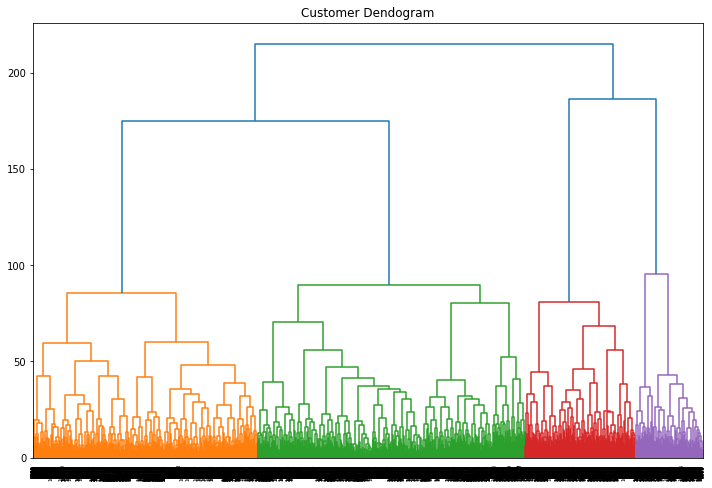

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

data2=data.iloc[:,2:4]
plt.figure (figsize=(12,8))
plt.title('Customer Dendogram')
shc.dendrogram (shc.linkage(data, method = 'ward'));

### A Dendogram showing the full tree is plotted to show the complexity of the data

### In this section the max_depth parameter is optimised. For this the random forest classification is run for variaous number of depths frmo 1-30 and accuracy of the model is calculated for each case.

In [56]:
from sklearn.ensemble import RandomForestClassifier 
accuracy = []
for i in range(1,31):
     rf = RandomForestClassifier(max_depth=i, n_estimators=50)
     rf.fit(X_train, y_train)
     prediction_test = rf.predict(X_test)
     d=confusion_matrix(y_test, prediction_test)
     accuracy.append((d[0,0]+d[1,1])/d.sum())



In [57]:
n=list(range(1,31))

### A plot between the max_depths and the accuracy of the test data shows that accuracy plateaus around 97%. The lease number of depths to achieve this accuracy is around 15. So next the same classifier is used with max_depth as 15

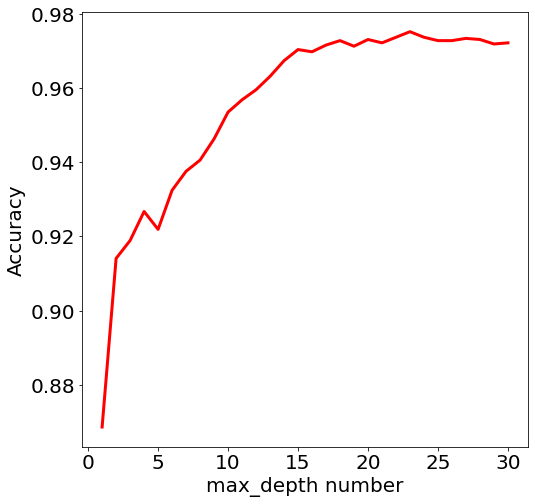

In [59]:
plt.figure(figsize=(8,8))
plt.xlabel('max_depth number', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.yticks(fontsize=20)
plt.plot(n,accuracy,'r',linewidth=3)


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=15, n_estimators=50)

#max_depth=2/3/4/5 n_estimators=50/100/150/200 criterion=entropy/gini
rf.fit(X_train, y_train)
prediction_train = rf.predict(X_train)
print("Confusion Matrix for train data \n", confusion_matrix(y_train, prediction_train))

print("\nClassification Report for train data \n")

print(classification_report(y_train, prediction_train))
prediction_test = rf.predict(X_test)
prediction_test
print("Confusion Matrix for test data \n", confusion_matrix(y_test, prediction_test))

print("\nClassification Report for test data \n")

print(classification_report(y_test, prediction_test))

Confusion Matrix for train data 
 [[3353   79]
 [  45 4260]]

Classification Report for train data 

              precision    recall  f1-score   support

          -1       0.99      0.98      0.98      3432
           1       0.98      0.99      0.99      4305

    accuracy                           0.98      7737
   macro avg       0.98      0.98      0.98      7737
weighted avg       0.98      0.98      0.98      7737

Confusion Matrix for test data 
 [[1400   65]
 [  45 1807]]

Classification Report for test data 

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1465
           1       0.97      0.98      0.97      1852

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



### As expected the accuracy of the test data is 97% and the train is also 98% not very differnt from test data. This final model is a better ML  model to classify the given data.